In [2]:
import csv
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from datetime import datetime

In [3]:
DATA_FILE = f'%s-data.csv' %datetime.today().strftime('%Y-%m-%d')

In [8]:
data = pd.read_csv(DATA_FILE)

In [9]:
data.columns

Index(['id', 'title', 'categoryId', 'playlistId', 'duration', 'views',
       'uploadedDate'],
      dtype='object')

In [10]:
playlists = pd.Series(data['playlistId']).unique()
tuple(playlists)

('PLOtl7M3yp-DX32N0fVIyvn7ipWKNGmwpp',
 'PLOtl7M3yp-DVBdLYatrltDJr56AKZ1qXo',
 'PLE18841CABEA24090',
 'PLE7DDD91010BC51F8',
 'PLUl4u3cNGP61Oq3tWYp6V_F-5jb5L2iHb',
 'PLUl4u3cNGP63WbdFxL8giv4yhgdMGaZNA',
 'PLUl4u3cNGP60ZaGv5SgpIk67YnH1WqCLI',
 'PLF83B8D8C87426E44',
 'PLUl4u3cNGP619EG1wp0kT-7rDE_Az5TNd',
 'PLUl4u3cNGP61-9PEhRognw5vryrSEVLPr',
 'PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab',
 'PLZHQObOWTQDMsr9K-rj53DwVRMYO3t5Yr',
 'PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi',
 'PLZHQObOWTQDNPOjrT6KVlfJuKtYTftqH6',
 'PL2SOU6wwxB0v1kQTpqpuu5kEJo2i-iUyf',
 'PLVext98k2evjIFqVggHfvecnFu4tTJK_o',
 'PLVext98k2evi8mDNRo4MwIgVgSmwM3cS8',
 'PLSQl0a2vh4HA50QhFIirlEZRXG4yjcoGM',
 'PLWKjhJtqVAbmGw5fN5BQlwuug-8bDmabi',
 'PLWKjhJtqVAbluXJKKbCIb4xd7fcRkpzoz',
 'PL6cactdCCnTLkQah9GKzsJmiLbegy4dEk',
 'PLC3y8-rFHvwgg3vaYJgHGnModB54rxOk3')

In [18]:
playlist_selector = data[(data['playlistId']=='PLE18841CABEA24090')]

In [19]:
playlist_selector

,id,title,categoryId,playlistId,duration,views,uploadedDate
53,#NAME?,Lecture 1A: Overview and Introduction to Lisp,27,PLE18841CABEA24090,PT1H12M56S,42061,2019-08-22T22:17:39Z
54,V_7mmwpgJHU,Lecture 1B: Procedures and Processes; Substitu...,27,PLE18841CABEA24090,PT58M22S,8295,2019-08-22T22:17:21Z
55,eJeMOEiHv8c,Lecture 2A: Higher-order Procedures,27,PLE18841CABEA24090,PT1H1M21S,5473,2019-08-22T22:17:21Z
56,DrFkf-T-6Co,Lecture 2B: Compound Data,27,PLE18841CABEA24090,PT1H16M47S,4140,2019-08-22T22:17:22Z
57,PEwZL3H2oKg,Lecture 3A: Henderson Escher Example,27,PLE18841CABEA24090,PT1H15M25S,4295,2019-08-22T22:17:22Z
58,bV87UzKMRtE,Lecture 3B: Symbolic Differentiation; Quotation,27,PLE18841CABEA24090,PT44M2S,2341,2019-08-22T22:17:21Z
59,_fXQ1SwKjDg,Lecture 4A: Pattern Matching and Rule-based Su...,27,PLE18841CABEA24090,PT1H3M10S,2808,2019-08-22T22:17:22Z
60,OscT4N2qq7o,Lecture 4B: Generic Operators,27,PLE18841CABEA24090,PT1H23M38S,1832,2019-08-22T22:17:21Z
61,dO1aqPBJCPg,"Lecture 5A: Assignment, State, and Side-effects",27,PLE18841CABEA24090,PT1H15M20S,1921,2019-08-22T22:17:21Z
62,yedzRWhi-9E,Lecture 5B: Computational Objects,27,PLE18841CABEA24090,PT1H4M31S,1791,2019-08-22T22:17:21Z


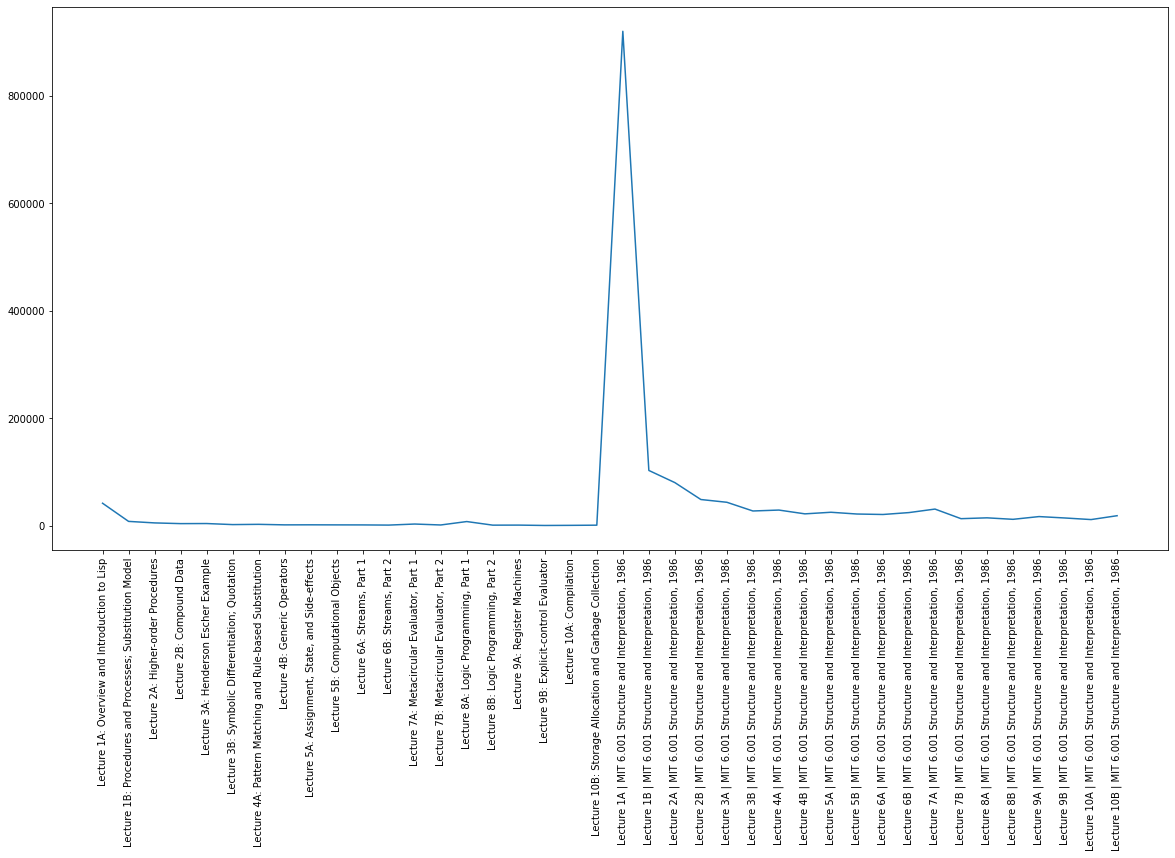

In [22]:
fig = plt.figure(figsize=(20, 10))
xticks = plt.xticks(rotation=90)
ticklabels = plt.ticklabel_format(useOffset=False, style='plain', useLocale=True)
plt.plot(playlist_selector['title'], playlist_selector['views'])